# IA Paper 4 - Mathematics - Examples paper 8

## Question 1

A train of digital pulses is periodic with period $2\pi$ and has the form

$$
f(t) = 
\begin{cases}
    1 & \text{if} \  0 < t \le T \\
    0 & \text{if} \ T < t \le 2 \pi
\end{cases}
$$

Express $f(t)$ as a Fourier series, and evaluate the coefficients. During transmission by a long cable, high-frequency components of the signal are attenuated. Explain briefly how the Fourier series allows this low-pass filtering effect to be studied.

Now consider a specific example of a cable that transmits perfectly all frequency components below 1 kHz but attenuates completely all frequency components above 1 kHz. The digital pulse train has period $2 \pi$ ms and $T = \pi$ ms. Use Python to plot the filtered signal.

**Python Hint**

When $T = \pi$ ms, the digital pulse train is just a square wave and we can use the supplied code to study its Fourier series. Its fundamental frequency is $1000/(2\pi) = 159$ Hz and its sixth harmonic is $159 \times 6 = 955$ Hz. So the cable will pass the first six terms of the Fourier series and attenuate the rest. To view the filtered signal, we need only change the program to `num_terms = 6`. Try modifying the program to plot the Fourier series for other functions in this examples paper. For functions of period $2\pi$, you need only change the expressions for `d`, `an` and `bn`. For other functions, you could just force the period to $2\pi$, i.e. set $\omega = 1$ in question 4, $L = \pi$ in question 6 and $T = 2\pi$ in Question 8.

### Solution

We first import some basic packages, including `numpy` and `matplotlib`. 

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

The Fourier series for the square wave is:

$$
f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty} a_n \cos (n t) + \sum_{n=1}^{\infty} b_n \sin (n t)
$$

with:

\begin{align}
a_0 &= \frac{T}{\pi} 
\\[1ex]
a_n &= \frac{\sin(n T)}{n \pi} 
\\[1ex]
b_n &= \frac{1 - \cos(n T)}{n \pi}
\end{align}

We now create some 'time' points in the interval $[-2 \pi, 2 \pi)$ at which to evaluate the Fourier series:

In [2]:
# Generate array for t
num_points = 200
dt = 4*np.pi/(num_points)
t = np.arange(-2*np.pi, 2*np.pi + dt, dt)

Next, we approxinate the Fourier series using a finite number of terms in the series:

In [3]:
# Initialise parameters T and a_0
T = np.pi
a_0 = T/np.pi

# Set number of terms for Fourier series
num_terms = 20
f = 0.5*a_0*np.ones(len(t))

# Calcualte the Fourier series of f(t)
for n in range(1, num_terms):
    a_n = (np.sin(n*T))/(n*np.pi)
    b_n = (1 - np.cos(n*T))/(n*np.pi)
    f += a_n * np.cos(n*t) + b_n*np.sin(n*t)

Let's plot our results using 20 terms from the Fourier series for $f(t)$.

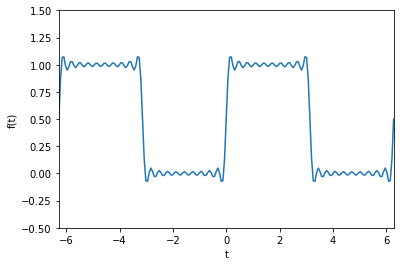

In [4]:
# Plot the Fourier function
plt.plot(t, f)

# Label axis
plt.xlabel("t")
plt.ylabel("f(t)")

# Set axis limit
plt.axis([t[0], t[-1], -0.5, 1.5]);

We can create an interactive plot to explore the effect of $n$ on the approximation of $f(t)$. 

In [5]:
# Let's make an interactive plot
from ipywidgets import interact, IntSlider

def plot_taylor_series(num_terms):
    # Initialise f array
    f = 0.5*a_0*np.ones(len(t))

    # Calculate the Fourier series
    for n in range(1, num_terms):
        a_n = (np.sin(n*T))/(n*np.pi)
        b_n = (1 - np.cos(n*T))/(n*np.pi)
        f += a_n*np.cos(n*t) + b_n*np.sin(n*t)

    # Plot the function
    plt.plot(t, f)

    # Label axis
    plt.xlabel("t")
    plt.ylabel("f(t)")

    # Set axis limit
    plt.axis([t[0], t[-1], -0.5, 1.5])

interact(plot_taylor_series, num_terms=IntSlider(min=0, max=200, step=1, value=10));

interactive(children=(IntSlider(value=10, description='num_terms', max=200), Output()), _dom_classes=('widget-…